# Probability Distributions

**Density Estimation**:
Modeling the probability distribution $p(\mathbf{x})$ of a random variable $\mathbf{x}$, given a finite set $\mathbf{x}_1, \dots, \mathbf{x}_N$ of observations.
For this task of density estimation, we assume that these data points are independently and identically distributed (i. i. d.).

### Table of Contents
1. [Setup](#setup)
2. [Binary Variables](#binary)
3. [Mulitnomial Variables (Optional)](#multinomial)
4. [Gaussian Distribution](#gaussian)
5. [Nonparametric Methods](#kde)

## Setup <a class="anchor" id="setup"></a>

In [2]:
import numpy as np
import pylab as plt
from ipywidgets import interact

def get_data(n_samples=20):
    np.random.seed(0)
    return (np.random.rand(n_samples) > 0.5).astype(int)

def get_data_kde():
    X = np.r_[np.random.normal(-3, 1, 50), np.random.normal(3, 1, 50)]
    return X

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Binary Variables <a class="anchor" id="binary"></a>
### Bernoulli Distribution
- Implement a class representing the `BernoulliDistribution`. It should contain the following methods:
  - `__init__(self, mu)` - Initialization method that verifies that $0 \leq \mu \leq 1$.
  - `prob(self, x)` - Should return the probability of a binary sample $x \in \{0, 1\}$: $$\operatorname{Bern}(x \mid \mu)=\mu^{x}(1-\mu)^{1-x}.$$
  - `log_prob(self, x)` - Should return the log-probability of a binary sample: $$\ln \operatorname{Bern}(x \mid \mu)= \ln \left(\mu^{x}(1-\mu)^{1-x} \right)$$
  This equation should be simplified.

In [3]:
# Bernoulli distribution
class BernoulliDistribution:
    def __init__(self, mu):
        assert 0 <= mu <= 1, 'Value for mu must be between 0 and 1.'
        self.mu = mu

    def prob(self, x):
        return (self.mu**x) * (1 - self.mu)**(1-x)

    def log_prob(self, x):
        return np.log(self.prob(x))

bern = BernoulliDistribution(mu=0.2)
bern.prob(0), bern.log_prob(0)  # Should return (0.8, -0.2231435513142097)

(0.8, -0.2231435513142097)

Consider the following observations:

In [4]:
X = get_data()

On the assumption that the observations are drawn independently, we can construct the likelihood function
$$p(\mathcal{D} \mid \mu)=\prod_{n=1}^{N} p\left(x_{n} \mid \mu\right)=\prod_{n=1}^{N} \mu^{x_{n}}(1-\mu)^{1-x_{n}}.$$
- Implement a function `likelihood` defining the equation above.

In [6]:
# Specify a Likelihood based on the data
def likelihood(mu, X):
    bernoulli_dist = BernoulliDistribution(mu=mu)
    lh = 1
    for x in X:
        lh *= bernoulli_dist.prob(x)

    return lh

likelihood(.5, [1, 1, 1])  # Should return 0.125

0.125

The resulting likelihood may show a tiny values, which may lead to numerical problems during the optimization (e.g., when we have big number of samples). To ensure numerical stability as well as ease further calculation, we will make use of the logarithm as it does not change the optimum of a function.
- Implement a function `log_likelihood` returning the log likelihood.

In [15]:
# Specify a Likelihood based on the data
def log_likelihood(mu, X):
    return np.log(likelihood(mu=mu, X=X)) # one solution  

log_likelihood(0.5, [1, 1, 1])  # Should return -2.0794415416798357

-2.0794415416798357

- Plot the two different likelihood functions for different values of $0 \leq \mu \leq 1$.

/var/folders/0p/nmvxp1px72q3ml7745bcbn9m0000gn/T/ipykernel_3861/3412962023.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(likelihood(mu=mu, X=X)) # one solution


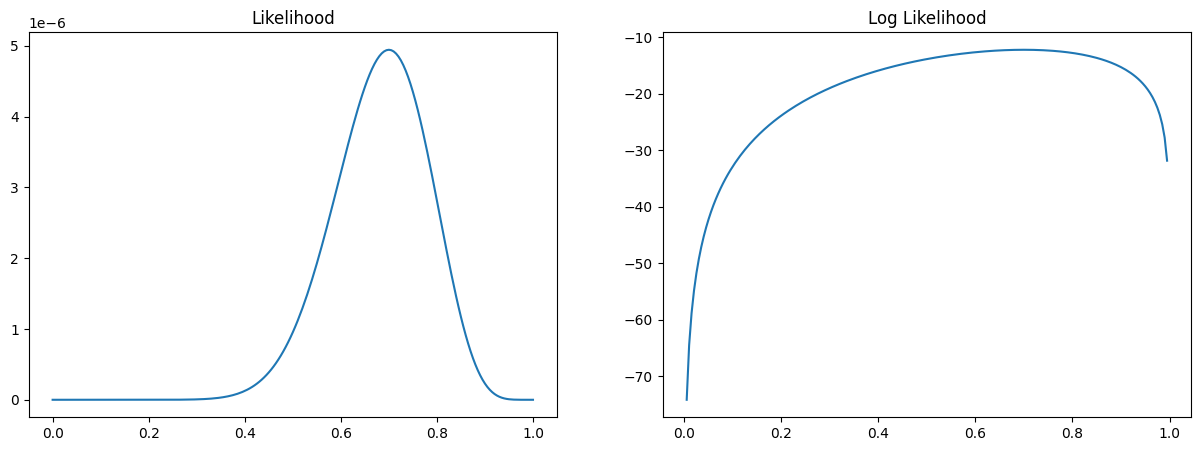

In [23]:
axis = np.linspace(0, 1, 201)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Likelihood')
lh_list = [likelihood(X=X, mu=mu) for mu in axis]
plt.plot(axis, lh_list)

plt.subplot(122)
plt.title('Log Likelihood')
llh_list = [log_likelihood(X=X, mu=mu) for mu in axis]
plt.plot(axis, llh_list)

plt.show()

If we set the derivative of $\ln p(\mathcal{D} | \mu)$ with respect to $\mu$ equal to zero, we obtain the maximum likelihood estimator $$\mu_{\mathrm{ML}}=\frac{1}{N} \sum_{n=1}^{N} x_{n}.$$
- Compute the maximum likelihood estimator using our observations and verify visually that it corresponds to the maximum in both plots.

In [19]:
# ML Solution
N = len(X)
mu_ml = (1/N) * np.sum(X)
mu_ml

0.7000000000000001

### Binomial Distribution
- Implement the class `BinomialDistribution` containing the following methods:
  - `__init__(self, n, mu)` - Initialization method saving parameters and verifying their domain.
  - `prob(self, x)` - Should return the probability:  $$\operatorname{Bin}(m \mid N, \mu)=\left(\begin{array}{l} N \\ m \end{array}\right) \mu^{m}(1-\mu)^{N-m}.$$
  The normalization coefficient $$ \left(\begin{array}{l} N \\ m \end{array}\right) \equiv \frac{N !}{(N-m) ! m !}$$ can be implemented using `np.math.factorial`.

In [38]:
# np.math.factorial is deprecated, use math.factorial instead
from math import gamma, factorial as fact

In [28]:
class BinomialDistribution:
    def __init__(self, n, mu):
        self.n = n
        self.mu = mu

    def prob(self, x):
        norm_factor = fact(self.n) / (fact(self.n-x) * fact(x))
        return norm_factor * self.mu**x * (1 - self.mu)**(self.n - x)

binom = BinomialDistribution(10 , .5)
binom.prob(5)  # Should return 0.24609375

0.24609375

- Plot the binomial distribution ($N=10, \mu=.25$) by using a bar plot.

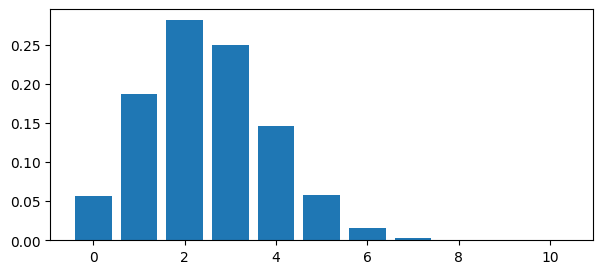

In [37]:
binom = BinomialDistribution(10 , .25)
dist = np.array([binom.prob(x) for x in range(11)])
plt.figure(figsize=(7,3))
plt.bar(np.arange(11), dist)
plt.show()

### Beta Distribution
- Implement the class `BetaDistribution` containing the following methods:
  - `__init__(self, a, b)` - Initialization method saving parameters and verifying their domain.
  - `prob(self, x)` - Should return the probability: $$\operatorname{Beta}(\mu \mid a, b)=\frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)} \mu^{a-1}(1-\mu)^{b-1}$$
  The normalization coefficient $$ \frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)}$$ can be implemented using `np.math.gamma`.

In [39]:
class BetaDistribution:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def prob(self, x):
        norm_factor = gamma(self.a + self.b) / (gamma(self.a) * gamma(self.b))
        return norm_factor * x**(self.a - 1) * (1-x)**(self.b - 1)


beta = BetaDistribution(1, 3)
beta.prob(.5)  # Should return 0.75

0.75

- Plot the distribution for the given parameter settings:
  - $a=0.1\quad b=0.1$
  - $a=1\quad b=1$
  - $a=2\quad b=3$
  - $a=8\quad b=4$

In [ ]:
axis = np.linspace(1e-2, 1-1e-2, 201)

plt.subplot(221)
plt.title('a = {}, b = {}'.format(0.1, 0.1))
####################
# Your Code Here   #
####################

plt.subplot(222)
plt.title('a = {}, b = {}'.format(1, 1))
beta = BetaDistribution(1, 1)
plt.plot(axis, [beta.prob(x) for x in axis])
### ENDSOLUTION ###

plt.subplot(223)
plt.title('a = {}, b = {}'.format(2, 3))
####################
# Your Code Here   #
####################

plt.subplot(224)
plt.title('a = {}, b = {}'.format(8, 4))
####################
# Your Code Here   #
####################
plt.tight_layout()
plt.show()

### Bayesian Approach for Parameter Estimation
In a Bayesian approach, the posterior distribution of $\mu$ is now determined by multiplying the prior distribution $\operatorname{Beta}(\mu \mid a, b)$ with the likelihood function $\operatorname{Bin}(m \mid N, \mu)$ and subsequent normalization.

The observations below encode a coin toss ($0$ = tails, $1$ = heads):

In [ ]:
X = [1, 1, 1]

- Define a meaningful prior distribution
- Define the likelihood function
- Define the posterior distribution

In [ ]:
####################
# Your Code Here   #
####################

In [ ]:
plt.figure(figsize=(10, 5))
axis = np.linspace(1e-2, 1-1e-2, 201)

plt.subplot(131)
####################
# Your Code Here   #
####################

plt.subplot(132)
####################
# Your Code Here   #
####################

plt.subplot(133)
####################
# Your Code Here   #
####################

plt.tight_layout()
plt.show()

If our goal is to predict, as best we can, the outcome of the next trial, then we must evaluate the predictive distribution of $x$, given the observed data set $\mathcal{D}$. From the sum and product rules of probability, follows
$$p(x=1 \mid \mathcal{D})=\int_{0}^{1} p(x=1 \mid \mu) p(\mu \mid \mathcal{D}) \mathrm{d} \mu=\int_{0}^{1} \mu p(\mu \mid \mathcal{D}) \mathrm{d} \mu=\mathbb{E}[\mu \mid \mathcal{D}]$$

That is, the optimal prediction for $1$ is given by the mean of the beta distribution:
$$p(x=1 \mid \mathcal{D})=\frac{m+a}{m+a+l+b}$$
- Implement a `predict` function that uses the parameters of the posterior distribution to make predictions.

In [ ]:
####################
# Your Code Here   #
####################
predict(1, posterior_distribution)

In [ ]:
####################
# Your Code Here   #
####################

## Multinomial Variables (Optional) <a class="anchor" id="multinomial"></a>
* Implement the following distributions:

### Categorical Distribution
$$p(\mathbf{x} \mid \boldsymbol{\mu})=\prod_{k=1}^{K} \mu_{k}^{x_{k}}$$

In [ ]:
# Generalization Bernoulli
class Categorical:
    def __init__(self, mu):
####################
# Your Code Here   #
####################

    def prob(self, x):
####################
# Your Code Here   #
####################

cat_dist = Categorical(mu=[.5, .5, 0])
cat_dist.prob([0, 1, 0])

### Multinomial Distribution
$$
\operatorname{Mult}\left(m_{1}, m_{2}, \ldots, m_{K} \mid \boldsymbol{\mu}, N\right)=\left(\begin{array}{c}
N \\
m_{1}, m_{2}, \ldots, m_{k}
\end{array}\right) \prod_{k=1}^{K} \mu_{k}^{m_{k}}
$$

In [ ]:
class Multinomial:
    def __init__(self, mu, n):
####################
# Your Code Here   #
####################

    def prob(self, x):
####################
# Your Code Here   #
####################

mult = Multinomial([.2, .3, .5], 6)
mult.prob([1, 2, 3])  #  should be 0.13499999999999998

### Dirichlet Distribution
$$\operatorname{Dir}(\boldsymbol{\mu} \mid \boldsymbol{\alpha})=\frac{\Gamma\left(\alpha_{0}\right)}{\Gamma\left(\alpha_{1}\right) \cdots \Gamma\left(\alpha_{K}\right)} \prod_{k=1}^{K} \mu_{k}^{\alpha_{k}-1}$$
where $\alpha_{0}=\sum_{k=1}^{K} \alpha_{k}$

In [ ]:
class Dirichlet:
    def __init__(self, alpha):
####################
# Your Code Here   #
####################

    def prob(self, x):
####################
# Your Code Here   #
####################

dirichlet = Dirichlet([.5, .5, .5])
dirichlet.prob([.1, .1, .8]) # should be 1.7794063585429432

## Gaussian Distribution <a class="anchor" id="gaussian"></a>
* Implement the following distributions:
$$\mathcal{N}\left(x \mid \mu, \sigma^{2}\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{1 / 2}} \exp \left\{-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right\}$$

In [ ]:
class Gaussian:
    def __init__(self, mu, sigma):
####################
# Your Code Here   #
####################

    def prob(self, x):
####################
# Your Code Here   #
####################

gaussian = Gaussian(0, 1)
gaussian.prob(0)  # should be 0.3989422804014327

$$\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \mathbf{\Sigma})=\frac{1}{(2 \pi)^{D / 2}} \frac{1}{|\mathbf{\Sigma}|^{1 / 2}} \exp \left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\}$$

In [ ]:
class MultivariateGaussian:
    def __init__(self, mu, cov):
####################
# Your Code Here   #
####################

    def prob(self, x):
####################
# Your Code Here   #
####################

multivariate_gaussian= MultivariateGaussian([0, 0], [[1, 0], [0, 1]])
multivariate_gaussian.prob([0, 0])  # should be 0.15915494309189535

## Nonparametric Methods <a class="anchor" id="kde"></a>
Observations are being drawn from some unknown probability density $p(\mathbf{x})$ in some $D$-dimensional space, which we shall assume to be Euclidean.
Goal: Estimate the value of $p(\mathbf{x})$.

### Kernel Density Estimators
As shown in the lecture, we can estimate the density by $$p(\mathbf{x})=\frac{K}{N V}$$ where
- $N$ is the number of observations,
- $K$ is the number of observations that lie inside some region $\mathcal{R}$, and
- $V$ is the volume of region $\mathcal{R}$.

By fixing $V$ and determining $K$ from the data, we obtain the *kernel density estimator*.

For the kernel density method, we assume that the region $\mathcal{R}$ is a small hypercube that has its center at the point $\mathbf{x}$ for which the density is to be determined.

In order to count the number $K$ of points falling within this region, it is convenient to define the following function:

$$k(\mathbf{u})=\left\{\begin{array}{ll}
1, & \left|u_{i}\right| \leq 1 / 2, \quad i=1, \ldots, D \\
0, & \text { otherwise }
\end{array}\right.$$
which represents a unit cube centered on the origin.

For the given data set, the total number of data points lying inside this cube will therefore be

$$K=\sum_{n=1}^{N} k\left(\frac{\mathbf{x}-\mathbf{x}_{n}}{h}\right)$$

When substituted into the estimation formula $p(x) =K/(NV)$, the following result is obtained for estimating the density at point $\mathbf{x}$:

$$p(\mathbf{x})=\frac{1}{N} \sum_{n=1}^{N} \frac{1}{h^{D}} k\left(\frac{\mathbf{x}-\mathbf{x}_{n}}{h}\right)$$
where we have used $V=h^D$ for the volume of a hypercube of side $h$ in $D$ dimensions.

- Implement the kernel density estimator we described above for the following observations.

In [ ]:
X = get_data_kde()

In [ ]:
####################
# Your Code Here   #
####################

- Plot the data using a histogram and plot the density using your implemented kernel density estimator.

In [ ]:
####################
# Your Code Here   #
####################